## Muhammad Awais
**BSSE-E2-78**

## imports and installations

In [3]:
!pip install transformers datasets evaluate matplotlib seaborn
!pip install rouge_score

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 10.0 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.
  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=

In [4]:
from transformers import AutoTokenizer,pipeline, AutoModelForSeq2SeqLM
from datasets import load_dataset
import evaluate
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [5]:
sns.set(style="whitegrid")

In [6]:
tokenizer = AutoTokenizer.from_pretrained("zedfum/arman-longformer-8k-finetuned-ensani")
model = AutoModelForSeq2SeqLM.from_pretrained("zedfum/arman-longformer-8k-finetuned-ensani")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/1.95k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/2.24M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/6.93M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/1.77k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.66k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.14G [00:00<?, ?B/s]

## Loading Dataset

In [7]:
dataset = load_dataset("mshojaei77/PersianTelegramChannels")

README.md:   0%|          | 0.00/1.49k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/9.46M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/60730 [00:00<?, ? examples/s]

## Summarization Module

In [8]:
def summarize_text(text, max_length=150, num_beams=4):

    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=1024)
    summary_ids = model.generate(inputs['input_ids'], max_length=max_length, num_beams=num_beams, early_stopping=True)
    return tokenizer.decode(summary_ids[0], skip_special_tokens=True)

## ROUGE Score Calculation and Visualization Module


In [9]:
rouge_metric = evaluate.load("rouge")

def compute_rouge_scores(predictions, references):
    """
    Computes ROUGE scores for predictions and references.
    """
    return rouge_metric.compute(predictions=predictions, references=references)


In [10]:
def plot_rouge_scores(rouge_results):
    """
    Plots ROUGE scores as a bar chart.
    """
    metrics = list(rouge_results.keys())
    scores = list(rouge_results.values())
    plt.figure(figsize=(8, 6))
    sns.barplot(x=metrics, y=scores, palette="viridis")
    plt.title("ROUGE Scores", fontsize=14)
    plt.xlabel("Metric", fontsize=12)
    plt.ylabel("F1-Score", fontsize=12)
    plt.ylim(0, 1)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.show()

In [11]:
generated_summaries = []
reference_summaries = []

In [12]:
for i in range(4):
    article_text = dataset['train'][i]['text']
    reference_summary = dataset['train'][i]['text']
    summary = summarize_text(article_text)

    generated_summaries.append(summary)
    reference_summaries.append(reference_summary)

    print(f"Article {i+1}:")
    print(f"Original Text: {article_text[:400]}...")
    print(f"Generated Summary: {summary}")
    print("-" * 80)

Article 1:
Original Text: 
تو بر نمی گردی...text>وَ این غمگین ترین شعر جهان است! 
که ترجمه نمی شود ؛ 
 
یعنی تو را  
به هیچ زبانی 
 نمی توان برگرداند؟! 
 
@amiralichannel
...
Generated Summary: شعر غمگین به عنوان یکی از مهم ترین و تأثیرگذارترین انواع شعر در زبان فارسی به شمار می رود. در این مقاله با روش توصیفی تحلیلی و با استفاده از منابع کتابخانه ای به بررسی و تحلیل شعر غمگین پرداخته شده است. یافته های این تحقیق نشان می دهد که شعر غمگین در مقایسه با سایر انواع شعر، دارای ویژگی های زبانی و زبانی است و از این رو می توان آن را به دو دسته زبانی و غیر زبانی تقسیم کرد. در دسته زبانی، شعر غمگین دارای ویژگی هایی است که از آن جمله می توان به ویژگی های آوایی، واژگانی، نحوی، واژگانی و... اشاره کرد. دسته غیر زبانی نیز از ویژگی هایی برخوردار است که می توان از آن ها به عنوان ویژگی های زبان شناختی شعر غمگین یاد کرد. از جمله این ویژگی ها
--------------------------------------------------------------------------------
Article 2:
Original Text: 
و عشق 
درد بزرگي ست 
وقتي كه درمانش  
در دستان كسي هست 
ك

In [13]:
rouge_results = compute_rouge_scores(generated_summaries, reference_summaries)
print("\nROUGE Scores:")
print(rouge_results)


ROUGE Scores:
{'rouge1': 0.0, 'rouge2': 0.0, 'rougeL': 0.0, 'rougeLsum': 0.0}


In [14]:
rouge_results = compute_rouge_scores(generated_summaries, reference_summaries)

In [15]:
print(generated_summaries)
print(reference_summaries)


['شعر غمگین به عنوان یکی از مهم ترین و تأثیرگذارترین انواع شعر در زبان فارسی به شمار می رود. در این مقاله با روش توصیفی تحلیلی و با استفاده از منابع کتابخانه ای به بررسی و تحلیل شعر غمگین پرداخته شده است. یافته های این تحقیق نشان می دهد که شعر غمگین در مقایسه با سایر انواع شعر، دارای ویژگی های زبانی و زبانی است و از این رو می توان آن را به دو دسته زبانی و غیر زبانی تقسیم کرد. در دسته زبانی، شعر غمگین دارای ویژگی هایی است که از آن جمله می توان به ویژگی های آوایی، واژگانی، نحوی، واژگانی و... اشاره کرد. دسته غیر زبانی نیز از ویژگی هایی برخوردار است که می توان از آن ها به عنوان ویژگی های زبان شناختی شعر غمگین یاد کرد. از جمله این ویژگی ها', 'عشق درد بزرگی نیست كه بتوان آن را درمان نمود. عشق درد بزرگي نیست كه نتوان درمانش نمود. درد بزرگی هست كه بتوان درمانش نمود، درمانش نمود و درمانش نمود. عشق دردی هست كه نمی توان درمانش نمود ولی می توان درمانش کرد. <br /> درد بزرگی ست كه نمی شود درمانش نمود ، درمانش نمود ؛ درمانش نمود؛ درمانش نمود پیدا نمی کند. درد بزرگي ست كه درمانش نمود پيدا نمی نماید.<b

## Dataset Analysis and Visualization Module


In [17]:

sns.set(style="whitegrid")

data = pd.DataFrame(dataset['train'])

def plot_text_length_distribution(data, column="text"):
    """
    Plots the distribution of text lengths in the dataset.
    """
    data['text_length'] = data[column].apply(lambda x: len(x.split()))
    plt.figure(figsize=(6, 4))
    sns.histplot(data['text_length'], bins=30, kde=True, color='skyblue')
    plt.title("Text Length Distribution", fontsize=16)
    plt.xlabel("Number of Words", fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.show()


In [18]:
def plot_sample_text_lengths(data, n=10, column="text"):
    """
    Plots the lengths of sample articles.
    """
    sample_lengths = data[column].apply(lambda x: len(x.split())).head(n)
    plt.figure(figsize=(6, 4))
    sns.barplot(x=sample_lengths.index, y=sample_lengths.values, palette="coolwarm")
    plt.title("Text Lengths of Sample Articles", fontsize=16)
    plt.xlabel("Sample Index", fontsize=12)
    plt.ylabel("Number of Words", fontsize=12)
    plt.show()

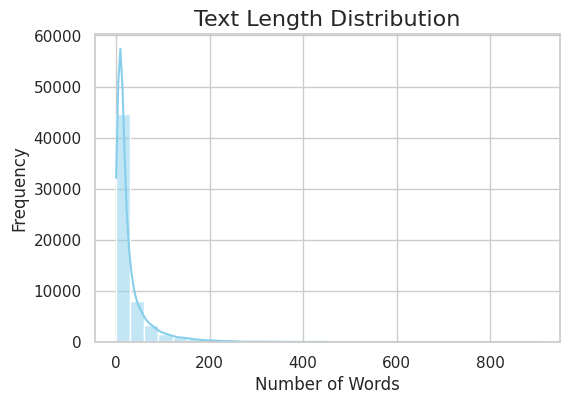

<ipython-input-18-f1ae00e2ff0f>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sample_lengths.index, y=sample_lengths.values, palette="coolwarm")


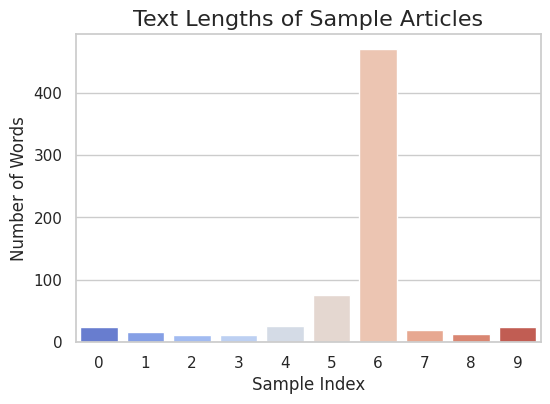

In [19]:
plot_text_length_distribution(data)
plot_sample_text_lengths(data)